In [2]:
import re
import os
import datetime
import scipy
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.optimize import minimize_scalar
import scipy.linalg as linalg


from sys import stdout
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, Binarizer, MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, cross_val_predict,cross_val_score , KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, explained_variance_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score, KFold , \
    cross_validate, StratifiedKFold


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./data/data_NIR_Piperine_mean.csv")
df = df.drop(columns=['Code2', 'extract_date_from_filename', 'TinhDau', 'DoAm', 'Peperine'])
df.head(2)

,901.398183,905.331226,909.259927,913.184288,917.104308,921.019987,924.931325,930.13969,934.0409,937.937768,...,1676.942091,1679.898431,1682.85043,1685.798089,1688.741406,1691.680383,1694.615018,1697.545313,1701.44562,TroTong
0,0.696805,0.694536,0.68393,0.681593,0.677989,0.672134,0.666920,0.665350,0.660200,0.653363,...,-0.268946,-0.284671,-0.290617,-0.284363,-0.280592,-0.270036,-0.26246,-0.259066,-0.235076,4.8055
1,0.680287,0.676388,0.66950,0.664196,0.660208,0.653955,0.650261,0.647121,0.642696,0.637289,...,-0.120851,-0.132234,-0.131808,-0.117417,-0.108648,-0.092320,-0.08283,-0.080144,-0.054218,4.3392


KeyError: 'Piperine'

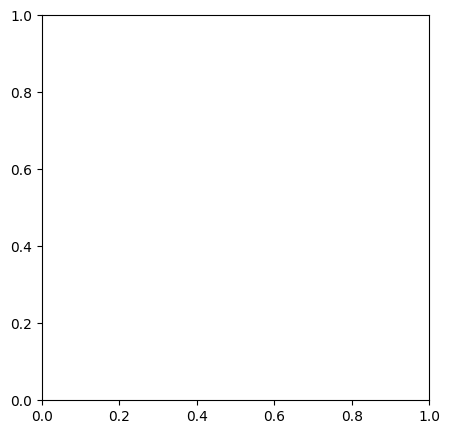

In [35]:
fig, axes = plt.subplots(figsize=(5,5))
sns.distplot(df["Piperine"], ax=axes)

plt.show()

In [4]:
wavelength = df.columns[:-1]
wavelength = np.array(wavelength)
wavelength = wavelength.astype(float)

In [83]:
a = df[df.iloc[:,1:].isna().any(axis=1)].index
df = df.drop(index=a,inplace=False)
df = df.reset_index(drop=True)
a

Index([], dtype='int64')

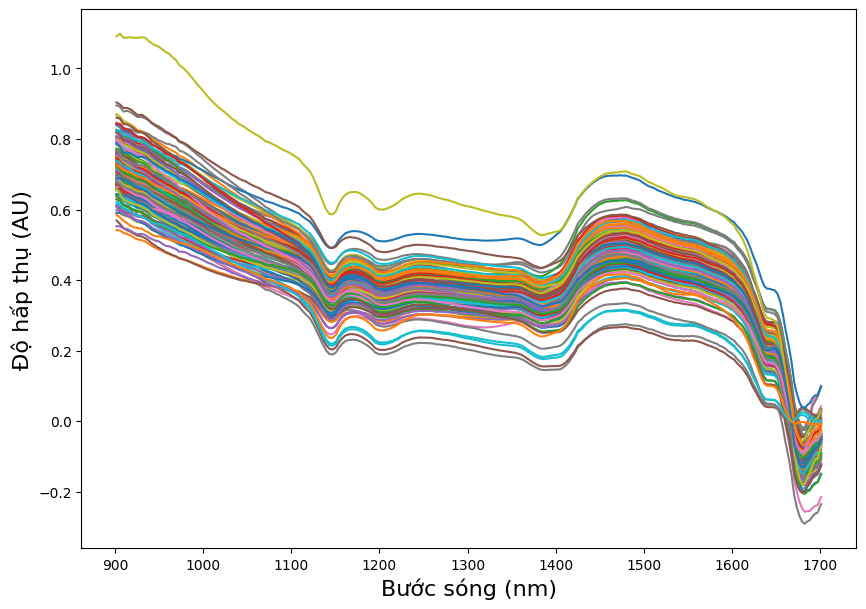

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
for i in range(0,len(df)):
    ax.plot(wavelength,df.iloc[i,1:])

#ax.set_title('Tổng hợp kết quả tiêu', fontsize=20)
ax.set_xlabel('Bước sóng (nm)', fontsize=16)
ax.set_ylabel('Độ hấp thụ (AU)', fontsize=16)
#ax.set_ylim([-0.5, 2.5])
plt.show()

In [5]:
from preprocessspectra_phuc import *

In [8]:
X = df.iloc[:,1:].values
y = df.iloc[:,1]

In [14]:
X_SNV = SG().fit_transform(spec = X, wavelength=wavelength)
fig, axes = plt.subplots(1,1,figsize=(15,10))
for j in range(0,len(X_SNV)):
    axes.plot(wavelength,X_SNV[j,:])
    axes.set_xlabel('Bước sóng (nm)', fontsize=18)
    axes.set_ylabel('Độ hấp thụ (AU)', fontsize=18)
plt.title("SG2", fontsize=18)
plt.show()

TypeError: SG.fit_transform() got an unexpected keyword argument 'wavelength'

In [ ]:
# ================== start computing ==================
# Note: In PartialLeastSquares Class, all X inputs should include 'wavelength'
# 'pretreat_method2' include 'MC' and 'ZS'
pls_instance = PartialLeastSquares(algorithm='ikpls_algorithm',
                                   max_nlv=20,
                                   pretreat_method1='SGMSC',
                                   pretreat_params1={'window_size':5, 'deriv':1},
                                   pretreat_method2='MC',
                                   customized_regions=[[900, 1100], [1500,1600]])

# -------------- cross validation --------------
# includes: 'cv_result' and 'cal_result'
pls_cv_result = pls_instance.cv(X_SNV, y.values, cv_sampling_method='cv_kfold_systematic_sampling',
                                sampling_param={'kfold':10}, calset_indices=None)

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(15,10))
for i, ax in zip(range(len(name_preprocess)), axes.flatten()):
    for j in range(0,len(X1[i])):
        ax.plot(wavelength,X1[i][j,:])

    ax.set_title('{}'.format(name_preprocess[i]), fontsize=14)
    ax.set_xlabel('Bước sóng (nm)', fontsize=12)
    ax.set_ylabel('Độ hấp thụ (AU)', fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1]

In [ ]:
X.shape

In [ ]:
SNV().fit_transform(X).shape

In [7]:
X_SNV = SNV().fit_transform(X)
X_SG1= savgol_filter(X, window_length=7, polyorder = 2, deriv=1)
X_SG2= savgol_filter(X, window_length=7, polyorder = 2, deriv=2)
X_MSC = MSC().fit_transform(X)

In [91]:
# Save the model to a file
with open('./models/model_preprocess_MSC.pkl', 'wb') as f:
    pickle.dump(MSC, f)

In [92]:
# Load the model from the file
with open('./models/model_preprocess_MSC.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [8]:
name_preprocess = ['RAW', 'SNV', 'MSC', 'SG1', 'SG2']
name_att = ['DoAm', 'TroTong', 'Peperine', 'TinhDau']
X1 = [X, X_SNV, X_MSC, X_SG1, X_SG2]

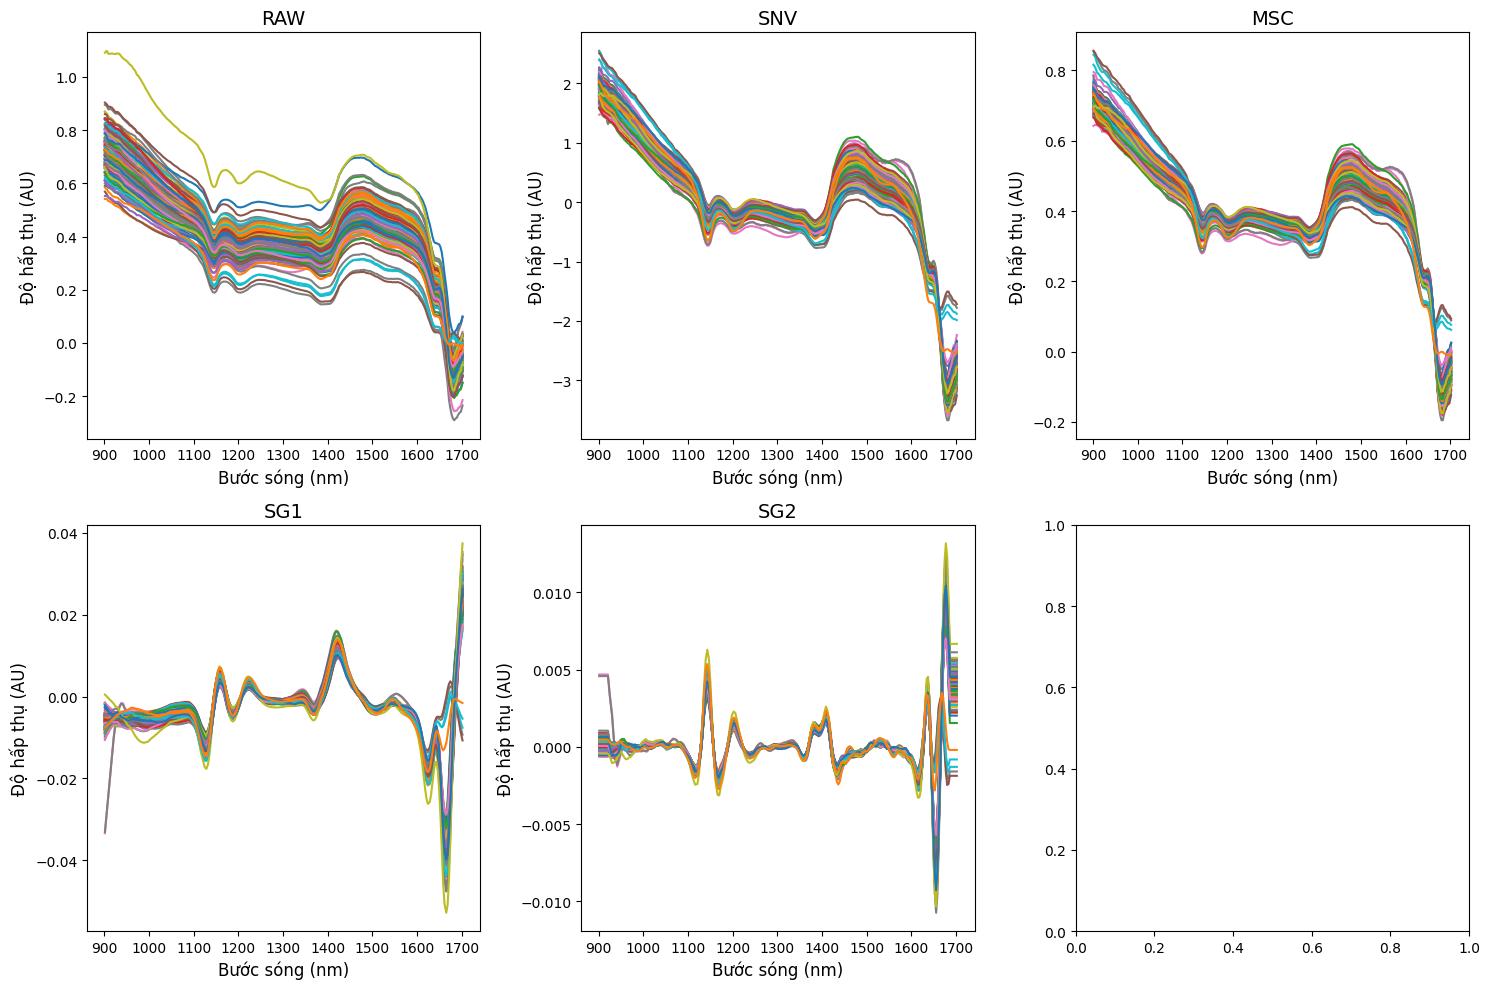

In [11]:
fig, axes = plt.subplots(2,3,figsize=(15,10))
for i, ax in zip(range(len(name_preprocess)), axes.flatten()):
    for j in range(0,len(X1[i])):
        ax.plot(wavelength,X1[i][j,:])

    ax.set_title('{}'.format(name_preprocess[i]), fontsize=14)
    ax.set_xlabel('Bước sóng (nm)', fontsize=12)
    ax.set_ylabel('Độ hấp thụ (AU)', fontsize=12)
plt.tight_layout()
plt.show()

#### PLS

In [9]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    # test with the first 15 components and choose the best for absorbance.
    parameters = {'n_components':np.arange(1,50,1)}
    # Define the grid-search estimator based on PLS regression
    pls = GridSearchCV(PLSRegression(), parameters, scoring = 'neg_mean_squared_error', verbose=0, cv=5)
    # Fit the estimator to the data
    pls.fit(X1[i], y)
    # Optional: print the best estimator
    print(pls.best_estimator_)
    # Apply the best estimator to calculate a cross-validation predicted variable
    y_cv = cross_val_predict(pls.best_estimator_, X1[i], y, cv=5)
    # Optional: calculate figures of merit
    rmse, score = np.sqrt(mean_squared_error(y, y_cv)), r2_score(y, y_cv)
    print("RMSE: {} - R2: {}".format(rmse,score))

RAW
PLSRegression(n_components=3)
RMSE: 0.43967772072729944 - R2: 0.0920107866048211
SNV
PLSRegression(n_components=3)
RMSE: 0.43352848583225734 - R2: 0.1172310528395224
MSC
PLSRegression(n_components=3)
RMSE: 0.4336792689091664 - R2: 0.11661688435956696
SG1
PLSRegression(n_components=1)
RMSE: 0.43445401003274464 - R2: 0.11345784684173987
SG2
PLSRegression(n_components=1)
RMSE: 0.4595373261129086 - R2: 0.008133195362050039


In [11]:
import pickle

In [12]:
pls = PLSRegression(n_components=1)
pls.fit(X1[3], y)

PLSRegression(n_components=1)

In [13]:
# Save the model to a file
with open('./models/model_regression_trotong.pkl', 'wb') as f:
    pickle.dump(pls, f)


In [44]:
parameters = {'n_components':np.arange(1,50,1)}
# Define the grid-search estimator based on PLS regression
pls = GridSearchCV(PLSRegression(), parameters, scoring = 'neg_mean_squared_error', verbose=0, cv=5)
# Fit the estimator to the data
pls.fit(X1[0], y)
# Optional: print the best estimator
print(pls.best_estimator_)
# Apply the best estimator to calculate a cross-validation predicted variable
y_cv = cross_val_predict(pls.best_estimator_, X1[0], y, cv=5)
# Optional: calculate figures of merit
rmse, score = np.sqrt(mean_squared_error(y, y_cv)), r2_score(y, y_cv)
print("RMSE: {} - R2: {}".format(rmse,score))

PLSRegression(n_components=9)
RMSE: 0.6684217243097126 - R2: 0.07886088476301312


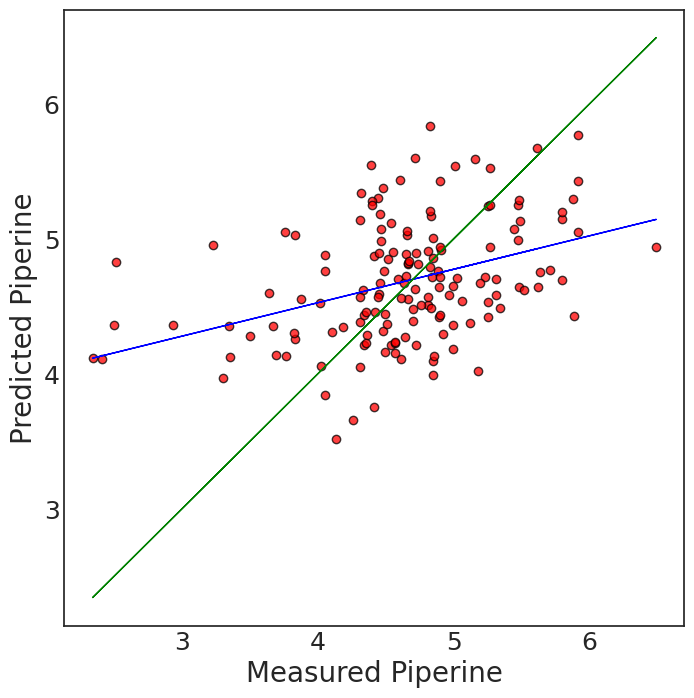

In [43]:
regression_plot(y, y_cv, title = "", variable = "Piperine")

In [31]:
def regression_plot(y_ref, y_pred, title = None, variable = None):
 
    # Regression plot
 
    z = np.polyfit(y_ref, y_pred, 1)
    with plt.style.context(('seaborn-v0_8-white')):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.scatter(y_ref, y_pred, c='red', edgecolors='k', alpha=0.75)
        ax.plot(y_ref, z[1]+z[0]*y_ref, c='blue', linewidth=1)
        ax.plot(y_ref, y_ref, color='green', linewidth=1)
 
        if title is not None:
            plt.title(title, fontsize=20)
        if variable is not None:
            plt.xlabel('Measured ' + variable, fontsize=20)
            plt.ylabel('Predicted ' + variable, fontsize=20)
 
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
    plt.show()

In [ ]:
# Fit the estimator to the data
pls.fit(X2, y)
# Optional: print the best estimator
print(pls.best_estimator_)
# Apply the best estimator to calculate a cross-validation predicted variable
y_cv = cross_val_predict(pls.best_estimator_, X2, y, cv=10)
# Optional: calculate figures of merit
rmse, score = np.sqrt(mean_squared_error(y, y_cv)), r2_score(y, y_cv)

In [12]:
# define a function to evaluate pls
def pls_evaluate_num_comp(X, y, num_comp):
    pls = PLSRegression(n_components=num_comp)
    y_cv = cross_val_predict(pls, X, y, cv=5)
    mse = mean_squared_error(y_cv, y)
    r2 = r2_score(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    return (y_cv, mse, r2, rpd)

In [13]:
# Try optimize the number of components (without variable selection) => we will use X1
def pls_evaluate_num_comps(X, y, num_comps):
    mses = []
    r2s = []
    rpds = []
    for num_comp in num_comps:
        _, mse, r2, rpd = pls_evaluate_num_comp(X, y, num_comp)
        mses.append(mse)
        r2s.append(r2)
        rpds.append(rpd)
    return (mses, r2s, rpds)

In [ ]:
plt.style.context('seabor'):


In [21]:
def plot_metric(scores, objective, yLabel):
    with plt.style.context('seaborn-v0_8-white'):
        plt.plot(num_comps, scores, '-o', color='blue')
        idx = np.argmin(scores) if objective == 'min' else np.argmax(scores)
        plt.plot(num_comps[idx], scores[idx], 'P', color='red', ms=10)
        plt.xlabel("Số lượng thành phần chính", fontsize=16)
        plt.ylabel(yLabel, fontsize=16)
    plt.show()
    return (num_comps[idx], scores[idx])

In [15]:
def pls_evaluate_plot_num_comps(X, y, num_comps):
    mses, r2s, rpds = pls_evaluate_num_comps(X, y, num_comps)
    # Plot mses
    num_comp, mse = plot_metric(mses, 'min', 'MSE')
    print(f'The best mse is {mse} with {num_comp} PLS components')
    # Plot r2s
    num_comp, r2  = plot_metric(r2s, 'max', 'R2')
    print(f'The best r2 is {r2} with {num_comp} PLS components')
    # Plot rpds
    num_comp, rpd = plot_metric(rpds, 'max', 'RPD')
    print(f'The best RPD is {rpd} with {num_comp} PLS components')

RAW


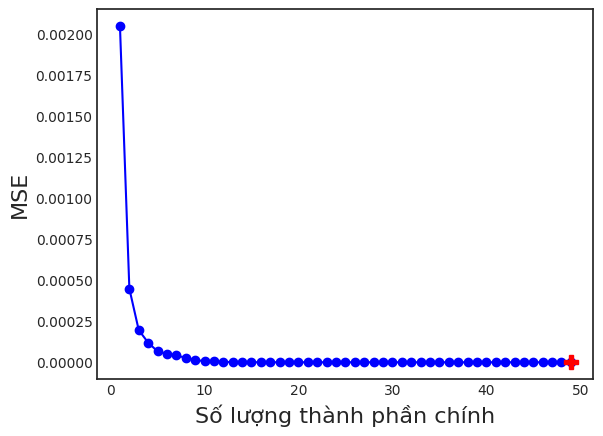

The best mse is 1.956947406187514e-10 with 49 PLS components


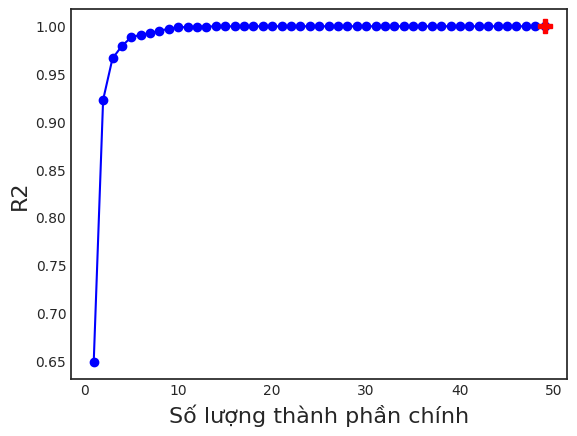

The best r2 is 0.9999999663458413 with 49 PLS components


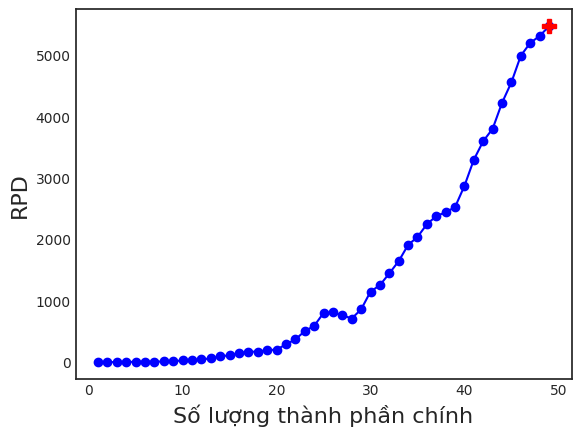

The best RPD is 5469.075913154219 with 49 PLS components
SNV


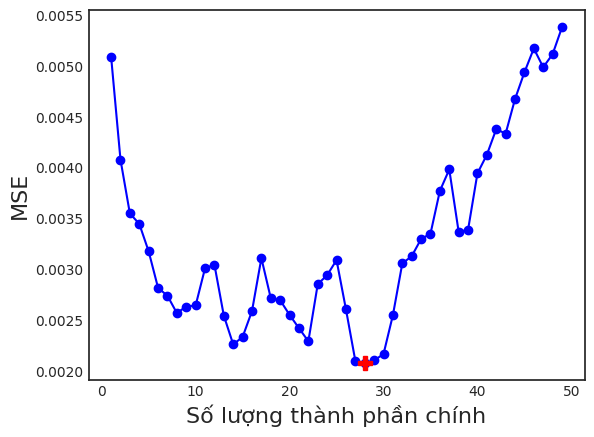

The best mse is 0.0020748582439264235 with 28 PLS components


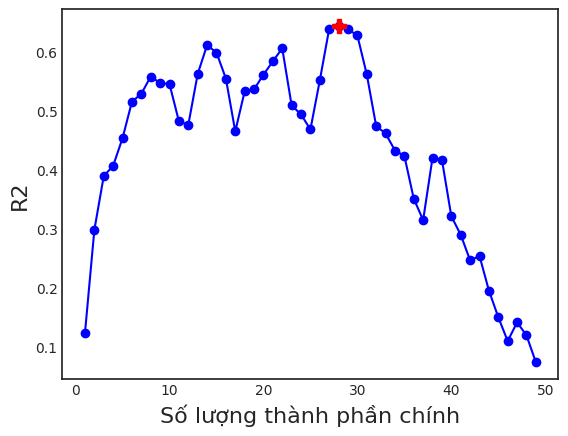

The best r2 is 0.6431809651621065 with 28 PLS components


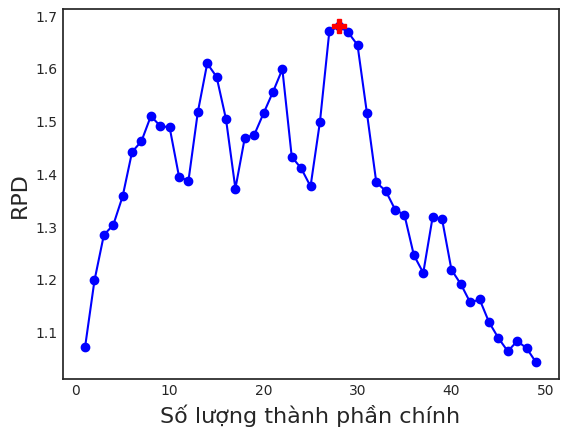

The best RPD is 1.6796133321415385 with 28 PLS components
MSC


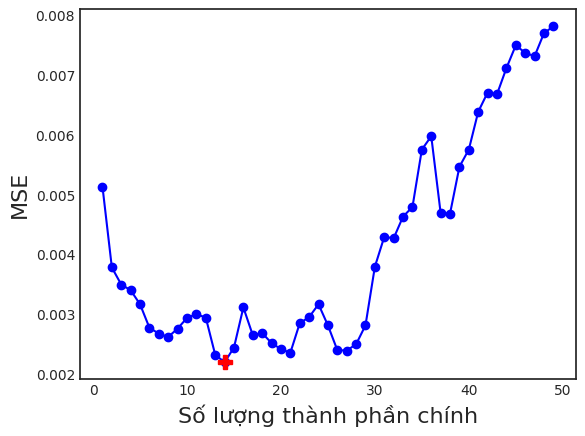

The best mse is 0.0021961626137026 with 14 PLS components


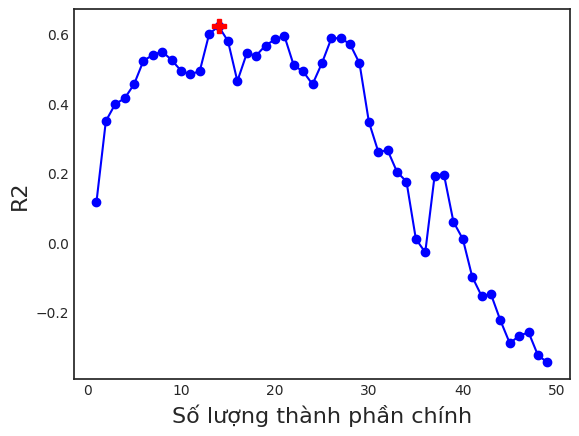

The best r2 is 0.6223199216320943 with 14 PLS components


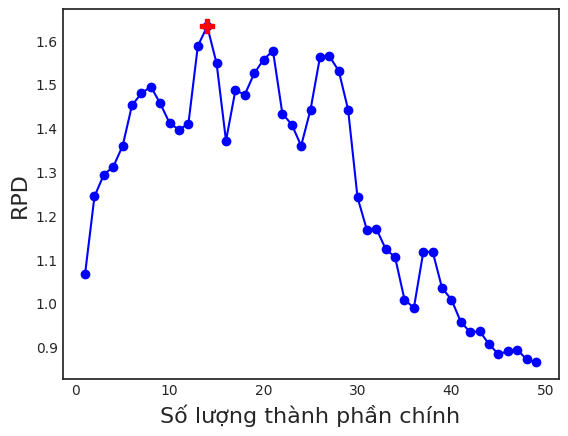

The best RPD is 1.6325680072366122 with 14 PLS components
SG1


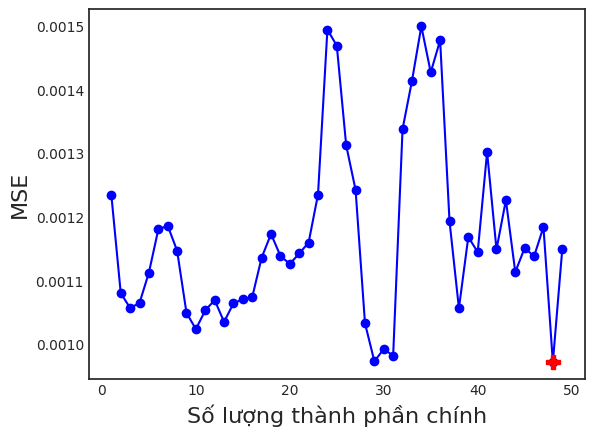

The best mse is 0.0009720573489790057 with 48 PLS components


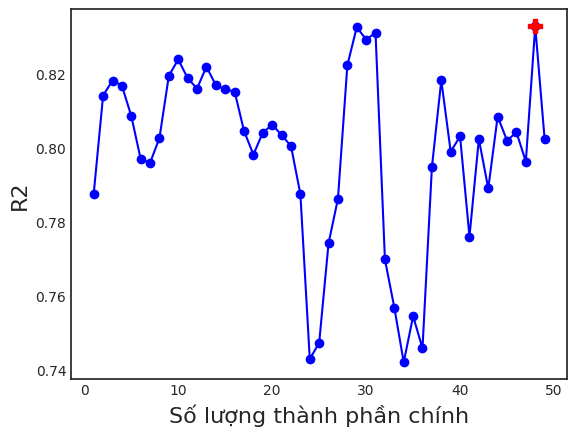

The best r2 is 0.8328326447914821 with 48 PLS components


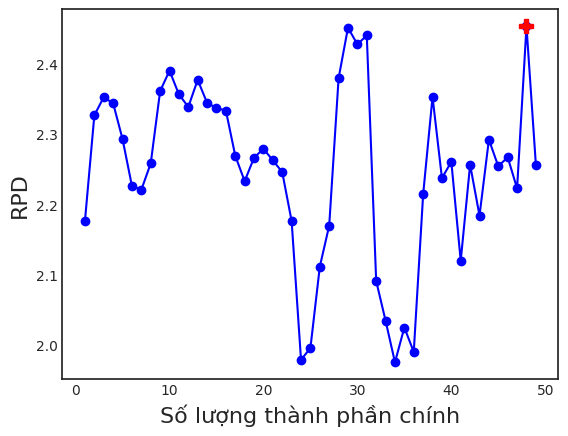

The best RPD is 2.4539040907397625 with 48 PLS components
SG2


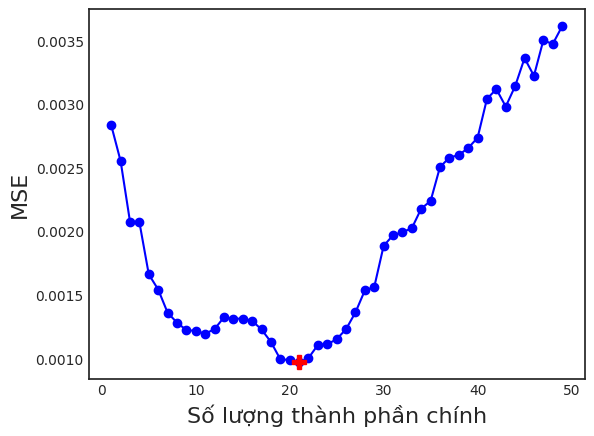

The best mse is 0.0009721361334662336 with 21 PLS components


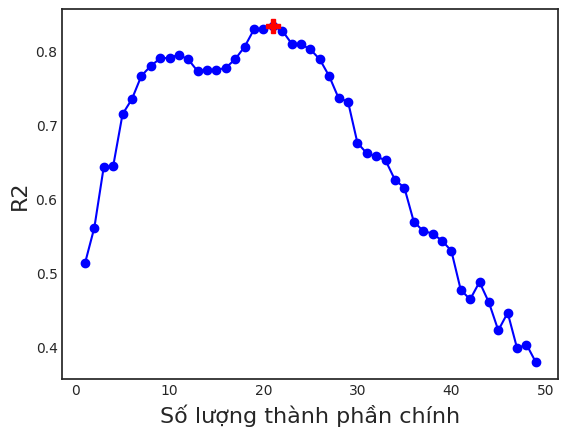

The best r2 is 0.8328190960081977 with 21 PLS components


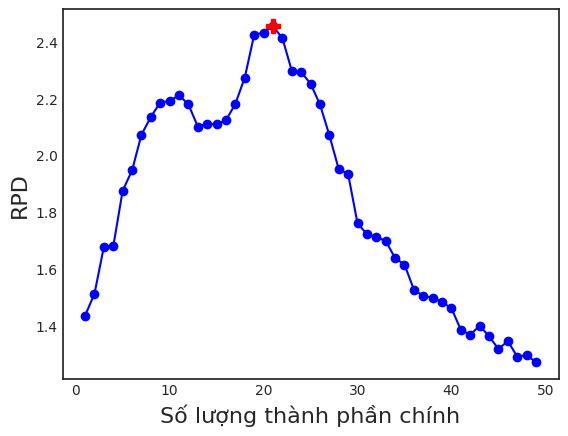

The best RPD is 2.453804653281374 with 21 PLS components


In [22]:
for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    # test with the first 15 components and choose the best for absorbance.
    num_comps = np.arange(1, 50)
    pls_evaluate_plot_num_comps(X1[i], y, num_comps)

In [ ]:
# Define the PLS regression object
pls = PLSRegression(n_components=16)
# Fit data
pls.fit(X1[0], y)

# Plot spectra
plt.figure(figsize=(8,9))
with plt.style.context(('seaborn-notebook')):
    ax1 = plt.subplot(211)
    plt.plot(wavelength, X1[0].T)
    plt.ylabel('Độ hấp thụ (AU)')

    ax2 = plt.subplot(212, sharex=ax1)
    plt.plot(wavelength, np.abs(pls.coef_[:,0]))
    plt.xlabel('Bước sóng (nm)')
    plt.ylabel('Giá trị tuyệt đối của các hệ số PLS')

    plt.show()

In [ ]:
simple_pls_cv(X1[0], y, 16)

In [ ]:
def pls_evaluate_and_plot_num_comp(X, y, num_comp):
    # Evaluate the result with first three components
    y_cv, mse, r2, rpd = pls_evaluate_num_comp(X, y, num_comp)
    # Print the result
    print('MSE: %0.4f' % (mse))
    print('R2: %0.4f' % (r2))
    print('RPD: %0.4f' % (rpd))
    # plot the regression
    p = np.polyfit(y, y_cv, deg=1)
    with plt.style.context('ggplot'):
        plt.figure(figsize=(6, 6))
        plt.scatter(y, y_cv, color='red', edgecolors='black')
        plt.plot(y, y, '-g', label='Expectation')
        plt.plot(y, np.polyval(p, y),'-b', label='Prediction regression')
        plt.legend()
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.plot()
    return (y_cv, mse, r2, rpd)

In [ ]:
# Test for absorbance at its best number of components (6)
_ = pls_evaluate_and_plot_num_comp(X_SNV, y1, 2)

In [23]:
def pls_variable_selection(X, y, max_comp):

    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))

    # Loop over the number of PLS components
    for i in range(max_comp):

        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)

        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))

        # Sort spectra accordingly
        Xc = X[:,sorted_ind]

        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):

            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)

            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)

            mse[i,j] = mean_squared_error(y, y_cv)

        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()


    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)

    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))

    Xc = X[:,sorted_ind]

    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)


def simple_pls_cv(X, y, n_comp):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=5)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression

    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('seaborn-v0_8-white')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('')
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Dự đoán')
        plt.ylabel('Thực tế')

        plt.show()

## RAW

In [24]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X1[0],y, 30)
simple_pls_cv(opt_Xc, y, ncomp)

100% completed


ValueError: zero-size array to reduction operation minimum which has no identity

## SNV

In [ ]:
opt_Xc_SNV, ncomp_SNV, wav_SNV, sorted_ind_SNV = pls_variable_selection(X1[1],y, 30)
simple_pls_cv(opt_Xc_SNV, y, ncomp_SNV)

## MSC

In [26]:
opt_Xc_MSC, ncomp_MSC, wav_MSC, sorted_ind_MSC = pls_variable_selection(X1[2],y, 30)
simple_pls_cv(opt_Xc_MSC, y, ncomp_MSC)

100% completed


ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
opt_Xc_SG1, ncomp_SG1, wav_SG1, sorted_ind_SG1 = pls_variable_selection(X1[3],y, 30)
simple_pls_cv(opt_Xc_SG1, y, ncomp_SG1)

In [ ]:
opt_Xc_SG2, ncomp_SG2, wav_SG2, sorted_ind_SG2 = pls_variable_selection(X1[4],y, 30)
simple_pls_cv(opt_Xc_SG2, y, ncomp_SG2)

In [ ]:
dictionary_data = {"a": 1, "b": 2}

a_file = open("data.pkl", "wb")
pickle.dump(dictionary_data, a_file)
a_file.close()


In [ ]:
import pickle

In [ ]:
def save_para_model(name, opt_Xc, ncomp, wav, sorted_ind):
    dictionary_data = {"opt_X": opt_Xc,
                    "ncomp": ncomp,
                    "wav": wav,
                    "sorted_ind": sorted_ind
                    }
    a_file = open("./data/{}.pkl".format(name), "wb")
    pickle.dump(dictionary_data, a_file)
    a_file.close()


In [ ]:
save_para_model("RAW_parameter", opt_Xc, ncomp, wav, sorted_ind)
save_para_model("SNV_parameter", opt_Xc_SNV, ncomp_SNV, wav_SNV, sorted_ind_SNV)
save_para_model("MSC_parameter", opt_Xc_MSC, ncomp_MSC, wav_MSC, sorted_ind_MSC)
save_para_model("SG1_parameter", opt_Xc_SG1, ncomp_SG1, wav_SG1, sorted_ind_SG1)
save_para_model("SG2_parameter", opt_Xc_SG2, ncomp_SG2, wav_SG2, sorted_ind_SG2)

In [ ]:
output['opt_X'].shape

In [ ]:
a_file = open("./data/MSC_parameter.pkl", "rb")
output = pickle.load(a_file)
print(output)

In [ ]:
sorted_ind2 = wavelength[output['sorted_ind']][output['wav']:].astype('int')
sorted_ind2

In [ ]:
# Create and fit the PLS regression model
pls_model = PLSRegression(n_components=output['ncomp'])
pls_model.fit(output['opt_X'], y)

# Extract the model coefficients
coefficients = pls_model.coef_

# Formulate the equation
intercept = pls_model.intercept_
equation = f"y = {round(intercept[0],3)} "
for i, coef in enumerate(coefficients):
    if coef[0] < 0:
        equation += f"{round(coef[0],3)} * X_{sorted_ind2[i]} "
    else:
        equation += f" + {round(coef[0],3)} * X_{sorted_ind2[i]} "
equation = equation[:-3]  # Remove the last ' + ' from the equation

print(equation)

In [ ]:
sorted_ind2 = output['sorted_ind'][output['wav']:]
len(sorted_ind2)


In [ ]:
ix = np.in1d(wavelength.ravel(), wavelength[sorted_ind][:wav])
import matplotlib.collections as collections

# Plot spectra with superimpose selected bands
fig, ax = plt.subplots(figsize=(8,5))
with plt.style.context(('seaborn-notebook')):
    ax.plot(wavelength, X1[0].T)
    plt.ylabel('Độ hấp thụ (AU)')
    plt.xlabel('Bước sóng (nm)')

collection = collections.BrokenBarHCollection.span_where(
    wavelength, ymin=0, ymax=2, where=ix == False, facecolor='blue', alpha=0.3)
ax.add_collection(collection)

plt.show()

In [ ]:
from sklearn.utils import resample



# List to store predictions from each bootstrap iteration
bootstrap_predictions = []
# Number of bootstrap iterations
n_iterations = 1000
# Bootstrap loop
for _ in range(n_iterations):
    # Bootstrap sample
    X_boot, y_boot = resample(output['opt_X'], y)

    # PLS regression model
    pls_model = PLSRegression(n_components=output['ncomp'])
    pls_model.fit(X_boot, y_boot)

    # Make predictions on the original dataset
    y_pred = pls_model.predict(output['opt_X'])

    # Store predictions from the current iteration
    bootstrap_predictions.append(y_pred)

# Calculate mean and standard deviation of the bootstrap predictions
bootstrap_predictions = np.array(bootstrap_predictions)
mean_predictions = np.mean(bootstrap_predictions, axis=0)
std_predictions = np.std(bootstrap_predictions, axis=0)

# Calculate confidence interval (95% confidence level)
confidence_interval = 1.96 * std_predictions

# Calculate mean squared error (optional)
mse = mean_squared_error(y, mean_predictions)
r2 = r2_score(y, mean_predictions)



In [ ]:
matrix1 = pd.DataFrame(bootstrap_predictions.reshape(1000,86))


In [ ]:
y

In [ ]:
matrix1.to_csv("./abccccc.csv")

In [ ]:
bootstrap_predictions.shape

In [ ]:
np.squeeze(mean_predictions)

In [ ]:
np.squeeze(mean_predictions), 'Kết quả': ['Dự đoán'] * len(mean_predictions)

In [ ]:
from scipy.stats import linregress

# Dữ liệu từ đường cong chuẩn (standard curve) của chất phân tích
concentrations = y
signals = np.squeeze(mean_predictions)


# Tính độ dốc và chặn đoạn của đường cong chuẩn (sử dụng hàm linregress từ scipy.stats)
slope, intercept, _, _, _ = linregress(concentrations, signals)

# Tính độ lệch chuẩn của tín hiệu của đường cong chuẩn
residuals = signals - (slope * concentrations + intercept)
sigma_curve = np.std(residuals)

# Tính toán LOD và LOQ
lod = 3.3 * (sigma_curve / slope)
loq = 10 * (sigma_curve / slope)

print(f"LOD: {lod}")
print(f"LOQ: {loq}")


In [ ]:
n = len(y)
r2 = 1.0-(sum((y-np.squeeze(mean_predictions))**2)/((n-1.0)*np.var(y,ddof=1)))
print('R^2: ' + str(r2))




In [ ]:
# Create dictionaries to store the data with corresponding machine information
actual_data = {'Piperine': y, 'Kết quả': ['Thực tế'] * len(y)}
pred_data = {'Piperine': np.squeeze(mean_predictions), 'Kết quả': ['Dự đoán'] * len(mean_predictions)}

# Convert the dictionaries to DataFrames
actual_df = pd.DataFrame(actual_data)
pred_df = pd.DataFrame(pred_data)

# Concatenate the DataFrames along the rows
result_df = pd.concat([actual_df, pred_df], ignore_index=True)


#sns.displot(result_df, x="Piperine", hue="Kết quả", kind="kde",fill=True)

sns.boxplot(result_df, x="Piperine", y = "Kết quả", hue="Kết quả", dodge=False)

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(np.squeeze(mean_predictions), label='Dự đoán', marker='o', color='blue')
plt.plot(y, label='Thực tế', marker='x', color='green')
plt.fill_between(np.arange(len(np.squeeze(mean_predictions))),
                 np.squeeze(mean_predictions) - np.squeeze(confidence_interval),
                 np.squeeze(mean_predictions) + np.squeeze(confidence_interval),
                 color='gray', alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Dữ liệu')
plt.ylabel('Hàm lượng Piperine')
#plt.title('Predicted Values vs Actual Values with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import pearsonr, kendalltau, spearmanr

# Assuming 'pdf' is a pandas DataFrame containing 'truth' and 'predicted' columns

# Define the scoring functions
def MAE(truth, predicted):
    return np.mean(np.abs(truth - predicted))

def MAPE(truth, predicted):
    return np.mean(np.abs((truth - predicted) / truth)) * 100.0

def MEDAE(truth, predicted):
    return np.median(np.abs(truth - predicted))

def MEDSE(truth, predicted):
    return np.median((truth - predicted) ** 2)

def MSE(truth, predicted):
    return np.mean((truth - predicted) ** 2)

def MSLE(truth, predicted):
    return np.mean((np.log1p(truth) - np.log1p(predicted)) ** 2)

def RAE(truth, predicted):
    return np.sum(np.abs(truth - predicted)) / np.sum(np.abs(truth - np.mean(truth)))

def RMSE(truth, predicted):
    return np.sqrt(np.mean((truth - predicted) ** 2))

def RMSLE(truth, predicted):
    return np.sqrt(np.mean((np.log1p(truth) - np.log1p(predicted)) ** 2))

def RRSE(truth, predicted):
    return np.sqrt(np.sum((truth - predicted) ** 2)) / np.sqrt(np.sum((truth - np.mean(truth)) ** 2))

def RSQ(truth, predicted):
    total_variance = np.sum((truth - np.mean(truth)) ** 2)
    residual_variance = np.sum((truth - predicted) ** 2)
    return 1 - (residual_variance / total_variance)

def SAE(truth, predicted):
    return np.sum(np.abs(truth - predicted))

def SSE(truth, predicted):
    return np.sum((truth - predicted) ** 2)

def PearsonR(truth, predicted):
    return pearsonr(truth, predicted)[0]

def KendallTau(truth, predicted):
    return kendalltau(truth, predicted)[0]

def SpearmanRho(truth, predicted):
    return spearmanr(truth, predicted)[0]

def R2(truth, predicted):
    total_variance = np.sum((truth - np.mean(truth)) ** 2)
    residual_variance = np.sum((truth - predicted) ** 2)
    return 1 - (residual_variance / total_variance)
# List of scoring methods
methods = [
    MAE, MAPE, MEDAE, MEDSE, MSE, MSLE, RAE, RMSE, RMSLE, RRSE, RSQ, SAE, SSE,
    PearsonR, KendallTau, SpearmanRho, R2
]

# Assuming 'pdf' is a pandas DataFrame containing 'truth' and 'predicted' columns
truth = y
predicted = np.squeeze(mean_predictions)

# Calculate scores using the defined scoring functions
scores = [method(truth, predicted) for method in methods]

# Store the scores in a DataFrame with method names as column names
scores_df = pd.DataFrame({'method': [method.__name__ for method in methods], 'score': scores})


print(scores_df)


In [ ]:
# Convert to 1-dimensional arrays
mean_predictions = np.squeeze(mean_predictions)
confidence_interval = np.squeeze(confidence_interval)

In [ ]:
# Plot confidence interval as a shaded region
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y)), y, label="Giá trị thực", color='b', alpha=0.9)
plt.plot(mean_predictions, label="Dự đoán", color='r', linewidth=2)
plt.fill_between(range(len(mean_predictions)),
                 np.squeeze(mean_predictions) - np.squeeze(confidence_interval),
                 np.squeeze(mean_predictions) + np.squeeze(confidence_interval),
                 color='orange', alpha=0.3, label="Độ tin cậy (95%)")
plt.ylabel("Hàm lượng Pipeine")
plt.title(f"Mô hình hồi quy PLS")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
z = np.polyfit(y, mean_predictions, 1)

r2 = r2_score(y, mean_predictions)
mse = mean_squared_error(y, mean_predictions)
rpd = np.sqrt(mse) / np.std(y)


with plt.style.context(('seaborn-notebook')):
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(y, mean_predictions, c='red', edgecolors='k')
    ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
    ax.plot(y, y, color='green', linewidth=1)

    plt.text(min(y), max(mean_predictions), f'R-squared = {r2:.2f}\nMSE = {mse:.2f}\nRPD = {rpd:.2f}', fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.5))
    plt.xlabel('Hàm lượng piperine thực tế')
    plt.ylabel('Hàm lượng piperine dự đoán')
    plt.title('')

    plt.show()

In [ ]:
np.where(abs(y- np.squeeze(mean_predictions)) > 0.1)

In [ ]:
y1 = np.delete(np.array(y), [ 7, 10, 15, 17, 18, 20, 21, 24, 31, 32, 34, 35, 44, 45, 49, 51, 58,
        59, 67, 69, 75, 76, 77, 82, 83], axis=0)

mean_predictions_2 = np.delete(np.squeeze(mean_predictions), [ 7, 10, 15, 17, 18, 20, 21, 24, 31, 32, 34, 35, 44, 45, 49, 51, 58,
        59, 67, 69, 75, 76, 77, 82, 83], axis=0)

In [ ]:
z = np.polyfit(y1, mean_predictions_2, 1)

r2 = r2_score(y1, mean_predictions_2)
mse = mean_squared_error(y1, mean_predictions_2)
rpd = np.sqrt(mse) / np.std(y1)


with plt.style.context(('seaborn-notebook')):
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(y1, mean_predictions_2, c='red', edgecolors='k')
    ax.plot(y1, z[1]+z[0]*y1, c='blue', linewidth=1)
    ax.plot(y1, y1, color='green', linewidth=1)

    plt.text(min(y1), max(mean_predictions_2), f'R-squared = {r2:.2f}\nMSE = {mse:.2f}\nRPD = {rpd:.2f}', fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.5))
    plt.xlabel('Hàm lượng piperine thực tế')
    plt.ylabel('Hàm lượng piperine dự đoán')
    plt.title('')

    plt.show()

In [ ]:
len(y1)

In [ ]:
plt.plot(abs(ground_truth_values - predicted_values))

In [ ]:
# Giả định ta có các giá trị thực tế và dự đoán cho một số mẫu kiểm tra
ground_truth_values = y
predicted_values = np.squeeze(mean_predictions)

# Độ chính xác và độ lặp lại: Tính độ chính xác và độ lặp lại bằng cách so sánh giá trị thực tế với giá trị dự đoán
def accuracy_and_repeatability(ground_truth, predicted):
    correct_predictions = [1 if abs(gt - pred) < 0.1 else 0 for (gt, pred) in zip(ground_truth, predicted)]
    accuracy = sum(correct_predictions) / len(correct_predictions)
    repeatability = sum(correct_predictions) / len(correct_predictions)  # Ở đây ta giả định cùng một mẫu được đo lặp lại nhiều lần
    return accuracy, repeatability

# Giới hạn phát hiện và giới hạn định lượng: Giả định ta có các giá trị ngưỡng cho giới hạn phát hiện và giới hạn định lượng
detection_limit = 1.5
quantification_limit = 2.0

# Độ nhạy và độ phân giải: Tính độ nhạy và độ phân giải bằng cách sử dụng các giá trị từ dữ liệu thực tế
def sensitivity_and_resolution(ground_truth):
    sensitivity = max(ground_truth) - min(ground_truth)
    resolution = sensitivity / 10  # Ở đây, ta giả định có 10 khoảng chia trong khoảng giá trị của piperine
    return sensitivity, resolution



# Tính tương tác chéo bằng cách kiểm tra sự tương tác giữa giá trị piperine và tạp chất
def cross_interference(data_with_interferences):
    cross_interference_values = [1 if abs(piperine - interference) < 0.2 else 0 for (_, piperine, interference) in data_with_interferences]
    cross_interference = sum(cross_interference_values) / len(cross_interference_values)
    return cross_interference

# Tính toán các yếu tố đánh giá
accuracy, repeatability = accuracy_and_repeatability(ground_truth_values, predicted_values)
sensitivity, resolution = sensitivity_and_resolution(ground_truth_values)


# In kết quả đánh giá
print(f"Độ chính xác: {accuracy}")
print(f"Độ lặp lại: {repeatability}")
print(f"Giới hạn phát hiện: {detection_limit}")
print(f"Giới hạn định lượng: {quantification_limit}")
print(f"Độ nhạy: {sensitivity}")
print(f"Độ phân giải: {resolution}")

In [ ]:
y

In [ ]:
pls = PLSRegression(n_components=ncomp)
pls.fit(opt_Xc, y1)

y_cv = cross_val_predict(pls, opt_Xc, y1, cv=5)
residual = abs(np.array(y1).flatten()- y_cv.flatten())

b = np.where(residual>0.5)


In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X_SNV,y1, 30)
simple_pls_cv(opt_Xc, y1, ncomp)

pls = PLSRegression(n_components=ncomp)
pls.fit(opt_Xc, y1)

y_cv = cross_val_predict(pls, opt_Xc, y1, cv=5)
residual = abs(np.array(y1).flatten()- y_cv.flatten())

c = np.where(residual>0.5)

In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X_MSC,y1, 30)
simple_pls_cv(opt_Xc, y1, ncomp)

pls = PLSRegression(n_components=ncomp)
pls.fit(opt_Xc, y1)

y_cv = cross_val_predict(pls, opt_Xc, y1, cv=5)
residual = abs(np.array(y1).flatten()- y_cv.flatten())

d = np.where(residual>0.5)

In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X_SG1,y1, 30)
simple_pls_cv(opt_Xc, y1, ncomp)

pls = PLSRegression(n_components=ncomp)
pls.fit(opt_Xc, y1)

y_cv = cross_val_predict(pls, opt_Xc, y1, cv=5)
residual = abs(np.array(y1).flatten()- y_cv.flatten())

e = np.where(residual>0.5)

In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X_SG2,y1, 30)
simple_pls_cv(opt_Xc, y1, ncomp)

pls = PLSRegression(n_components=ncomp)
pls.fit(opt_Xc, y1)

y_cv = cross_val_predict(pls, opt_Xc, y1, cv=5)
residual = abs(np.array(y1).flatten()- y_cv.flatten())

f = np.where(residual>0.5)

In [ ]:
merged_array = np.concatenate(( np.array(b).flatten(),
                               np.array(c).flatten(), np.array(d).flatten(),
                               np.array(e).flatten(), np.array(f).flatten()))


In [ ]:
merged_array

In [ ]:
pd.Data

In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X_fix,y2, 30)
simple_pls_cv(opt_Xc, y2, ncomp)

In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(snv(X_fix),y2, 30)
simple_pls_cv(opt_Xc, y2, ncomp)

In [ ]:
X1_fix2 = np.delete(X1_fix, [18, 27, 38], axis=0)


y3 = y2.drop([18, 27, 38], axis=0)
y3 = y3.reset_index(drop=True)

In [ ]:
X1_fix = np.delete(X1[1], [  5,  10,  21,  22,  25,  28,  34,  35,  36,  37,  40,  41,  48,
         54,  60,  64,  78,  94, 109, 121, 122, 137, 141, 148, 152], axis=0)


y2 = y1.drop([  5,  10,  21,  22,  25,  28,  34,  35,  36,  37,  40,  41,  48,
         54,  60,  64,  78,  94, 109, 121, 122, 137, 141, 148, 152], axis=0)
y2 = y2.reset_index(drop=True)

In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X1[1],y1 , 30)



In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X1_fix,y2 , 30)


In [ ]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X1_fix2,y3 , 30)


In [ ]:
pls = PLSRegression(n_components=ncomp)
pls.fit(opt_Xc, y3)

y_cv = cross_val_predict(pls, opt_Xc, y3, cv=5)

In [ ]:
type(y_cv)

In [ ]:
fig = px.scatter(y=np.array(y2).flatten(), x=y_cv.flatten(), trendline="ols")
fig.show()

In [ ]:
b = abs(np.array(y3).flatten()- y_cv.flatten())

np.where(b>0.6)

In [ ]:
simple_pls_cv(opt_Xc, y3, ncomp)

In [ ]:
simple_pls_cv(opt_Xc, y1, ncomp)

In [ ]:
y1 = y['Peperine']
for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X1[i],y1 , 30)
    simple_pls_cv(opt_Xc, y1, ncomp)

In [ ]:
y1 = y['TinhDau']
for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X1[i],y1 , 30)
    simple_pls_cv(opt_Xc, y1, ncomp)

In [ ]:
y1 = y['DoAm']
for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X1[i],y1 , 30)
    simple_pls_cv(opt_Xc, y1, ncomp)

In [ ]:
y1 = y['TroTong']
for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X1[i],y1 , 30)
    simple_pls_cv(opt_Xc, y1, ncomp)

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def simple_RFregression_cv(X, y):

    # Step 3: Create the random forest regression model
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X, y)

    # Step 6: Evaluate the best model
    y_c = rf_model.predict(X)
    y_cv = cross_val_predict(rf_model, X, y, cv=5)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

In [ ]:
y1 = y['TroTong']
for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    simple_RFregression_cv(X1[i], y1)

In [ ]:
y1 = y['Peperine']
for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    simple_RFregression_cv(X1[i], y1)

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
def simple_model_regression_cv(clf, X, y):
    clf.fit(X, y)

    # Step 6: Evaluate the best model
    y_c = clf.predict(X)
    y_cv = cross_val_predict(clf, X, y, cv=5)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
from sklearn.linear_model import LassoLarsCV


kr = GridSearchCV(
    linear_model.LassoLars(alpha=0.01),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3]},
)
kr.fit(X1[0], y1)
kr.best_estimator_


In [ ]:
reg = LassoLarsCV(cv=5).fit(X1[1], y1)
reg.score(X1[1], y1)


In [ ]:
krr = LassoLarsCV(cv=5)
simple_model_regression_cv(krr, X1[1], y1)


In [ ]:
y1 = y['DoAm']

for i in range(len(name_preprocess)):
    print(name_preprocess[i])
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X1[i], y1, test_size=0.3, random_state=42)

    reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    # Print the average R-squared score
    print(models)
